In [1]:
import pandas as pd
import geopandas as gpd
import math

In [2]:
input_file = "/content/MINISTRY OF COLLECTIVITY - Sheet1.csv" # @param {"type":"string"}
data=pd.read_csv(input_file)

In [8]:
data_geospatial=data.dropna(axis=0,subset=data.columns[2]).reset_index()

In [12]:
data_geospatial[['latitude','longitude']]=data_geospatial[data_geospatial.columns[3]].str.split(',',expand=True).dropna().astype(float)

In [13]:
gdf = gpd.GeoDataFrame(
    data_geospatial, geometry=gpd.points_from_xy(data_geospatial.longitude, data_geospatial.latitude), crs="EPSG:4326"
)

<Axes: >

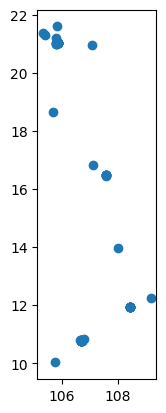

In [14]:
gdf.plot()

In [15]:
gdf.to_file("output.geojson", driver='GeoJSON')